In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Data Analysis

In [2]:
data = pd.read_csv('house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
del_cols = ['id', 'date', 'zipcode', 'lat', 'long']
data.drop(del_cols, axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


# Data Visualization

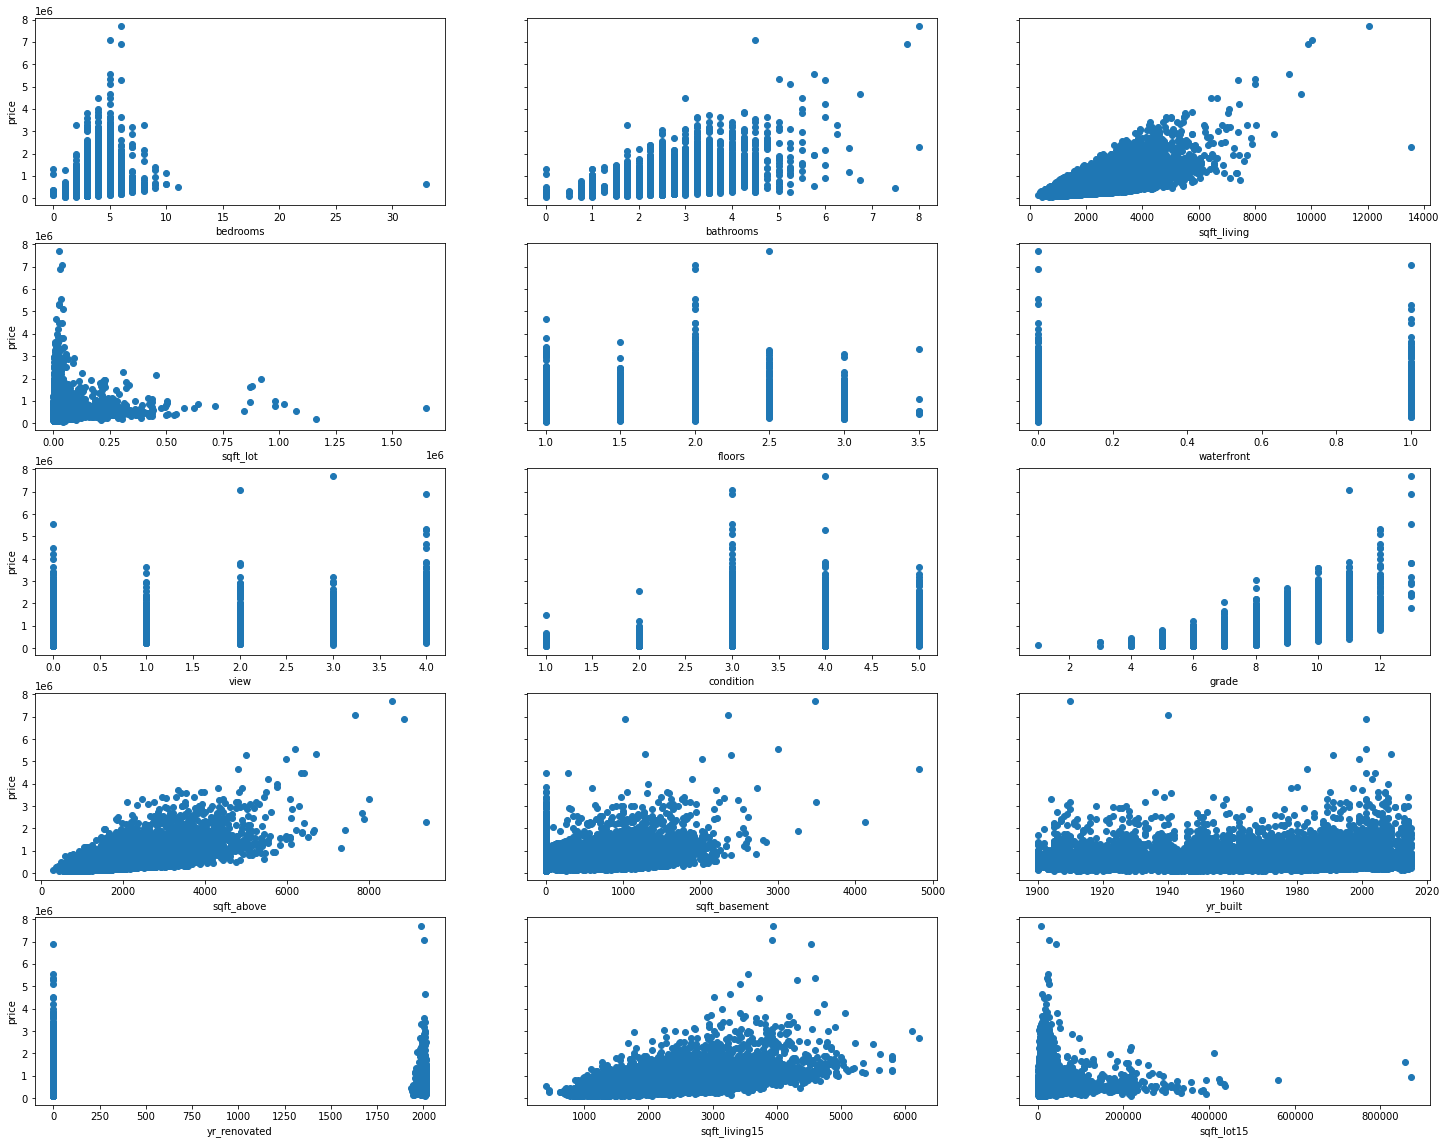

In [6]:
# plotting the relation of various fields

fig, ax = plt.subplots(5,3, sharey=True, figsize=(25,20))

ind = 1
for i in range(5):
    ax[i][0].set_ylabel('price')
    for j in range(3):
        ax[i][j].scatter(data.iloc[:, ind], data['price'])
        ax[i][j].set_xlabel(data.columns[ind])
        ind += 1

# Preprocessing

In [7]:
# replacing yr_renovated with yr_built if yr_renovated is 0
data['yr_renovated'].mask(data['yr_renovated'] == 0, data['yr_built'], inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,1800,7503


In [8]:
# checking presence of missing data

data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# abstraction of features and label

X, y = data.drop('price', axis=1), data['price']
print(X.shape, y.shape)

(21613, 15) (21613,)


# ML Modeling

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((17290, 15), (4323, 15), (17290,), (4323,))

In [12]:
# scaling the features in order to avoid bias of features

st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

X_train[:2]

array([[-0.39526335, -0.47445144, -0.32393262, -0.04387306, -0.91959976,
        -0.08499166, -0.30591651,  0.90907268,  1.15024328, -0.00725676,
        -0.65631017,  0.40400107,  0.3301831 ,  1.12607326,  0.01344043],
       [-1.46896378, -1.45258323, -1.18365301, -0.28577454, -0.91959976,
        -0.08499166, -0.30591651, -0.62542567, -1.41315603, -1.20004764,
        -0.20043274, -1.43056508, -1.54055391, -1.04652268, -0.28066159]])

In [13]:
# finding the best parameters using grid search

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [4, 5, 6],
              'min_samples_split': [3, 4, 5]}

grid = GridSearchCV(RandomForestRegressor(n_jobs=-1), param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error').fit(X_train, y_train)

print('Score: {:.3f}'.format(grid.score(X_test, y_test)))
print('Best Estimator: {}'.format(grid.best_estimator_))

Score: -134700.066
Best Estimator: RandomForestRegressor(max_depth=6, min_samples_split=4, n_estimators=200,
                      n_jobs=-1)


In [14]:
model = grid.best_estimator_

In [16]:
model.feature_importances_

array([0.00070706, 0.01343816, 0.31063071, 0.00362575, 0.0011361 ,
       0.02853032, 0.01216122, 0.00093852, 0.48949749, 0.00751957,
       0.00333937, 0.0902428 , 0.00271335, 0.02776813, 0.00775145])

In [18]:
# R2-Score of the model and mean_absolute_error

print('R2 Score on Training Data: {}'.format(r2_score(y_train, model.predict(X_train))))
print('R2 Score on Testing Data: {}'.format(r2_score(y_test, model.predict(X_test))))
print('Mean Absolute Error on Training Data: {}'.format(mean_absolute_error(y_train, model.predict(X_train))))
print('Mean Absolute Error on Testing Data: {}'.format(mean_absolute_error(y_test, model.predict(X_test))))

R2 Score on Training Data: 0.760073831093288
R2 Score on Testing Data: 0.6842345524899756
Mean Absolute Error on Training Data: 122302.21637800167
Mean Absolute Error on Testing Data: 134700.06555380902
